Tujuan: Memberikan Pemahaman mengenai perkembagan nilai siswa selama semester sekolah yang telah ia tempuh


The User: One-to-One Exchange, pemahaman data dari user dan pembuat

Function: Explanatory

Modul

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset rapot sekolah

In [28]:
# Data rapot
data = {
    'Semester': [1, 1, 1, 1, 1,
                 2, 2, 2, 2, 2,
                 3, 3, 3, 3, 3,
                 4, 4, 4, 4, 4,
                 5, 5, 5, 5, 5],
    'Mata Pelajaran': ['Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'PPKn',
                       'Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'PPKn',
                       'Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'PPKn',
                       'Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'PPKn',
                       'Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'PPKn'],
    'Tugas': [85, 80, 90, 70, 88,
              90, 85, 92, 75, 90,
              88, 82, 85, 80, 85,
              92, 90, 88, 75, 95,
              94, 91, 90, 78, 90],
    'UTS': [78, 75, 85, 80, 82,
             85, 80, 88, 70, 85,
             90, 78, 90, 75, 80,
             91, 85, 90, 80, 90,
             93, 88, 95, 80, 87],
    'UAS': [90, 88, 95, 75, 84,
             92, 90, 94, 80, 87,
             85, 86, 89, 78, 90,
             95, 88, 91, 82, 93,
             97, 90, 92, 85, 89],
}

# Membuat DataFrame
rapot_df = pd.DataFrame(data)

rapot_df.head()

,Semester,Mata Pelajaran,Tugas,UTS,UAS
0,1,Matematika,85,78,90
1,1,Bahasa Indonesia,80,75,88
2,1,IPA,90,85,95
3,1,IPS,70,80,75
4,1,PPKn,88,82,84


Menghitung rata-rata nilai rapot

In [29]:
# Menghitung rata-rata
rapot_df['Rata-rata'] = rapot_df[['Tugas', 'UTS', 'UAS']].mean(axis=1)

# Menghitung rata-rata nilai per semester
rata_rata_per_semester = rapot_df.groupby('Semester')['Rata-rata'].mean()

# Menghitung rata-rata nilai per mata pelajaran
rata_rata_mata_pelajaran = rapot_df.groupby('Mata Pelajaran')['Rata-rata'].mean()

Membuat plot visualisasi performa pada saat 5 semester

<ipython-input-33-45ba9f748c57>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_mata_pelajaran.index, y=rata_rata_mata_pelajaran.values, ax=axs[0, 1], palette='pastel')
<ipython-input-33-45ba9f748c57>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_rata_mata_pelajaran.index, y=rata_rata_mata_pelajaran.values, ax=axs[1, 1], palette='light:blue')


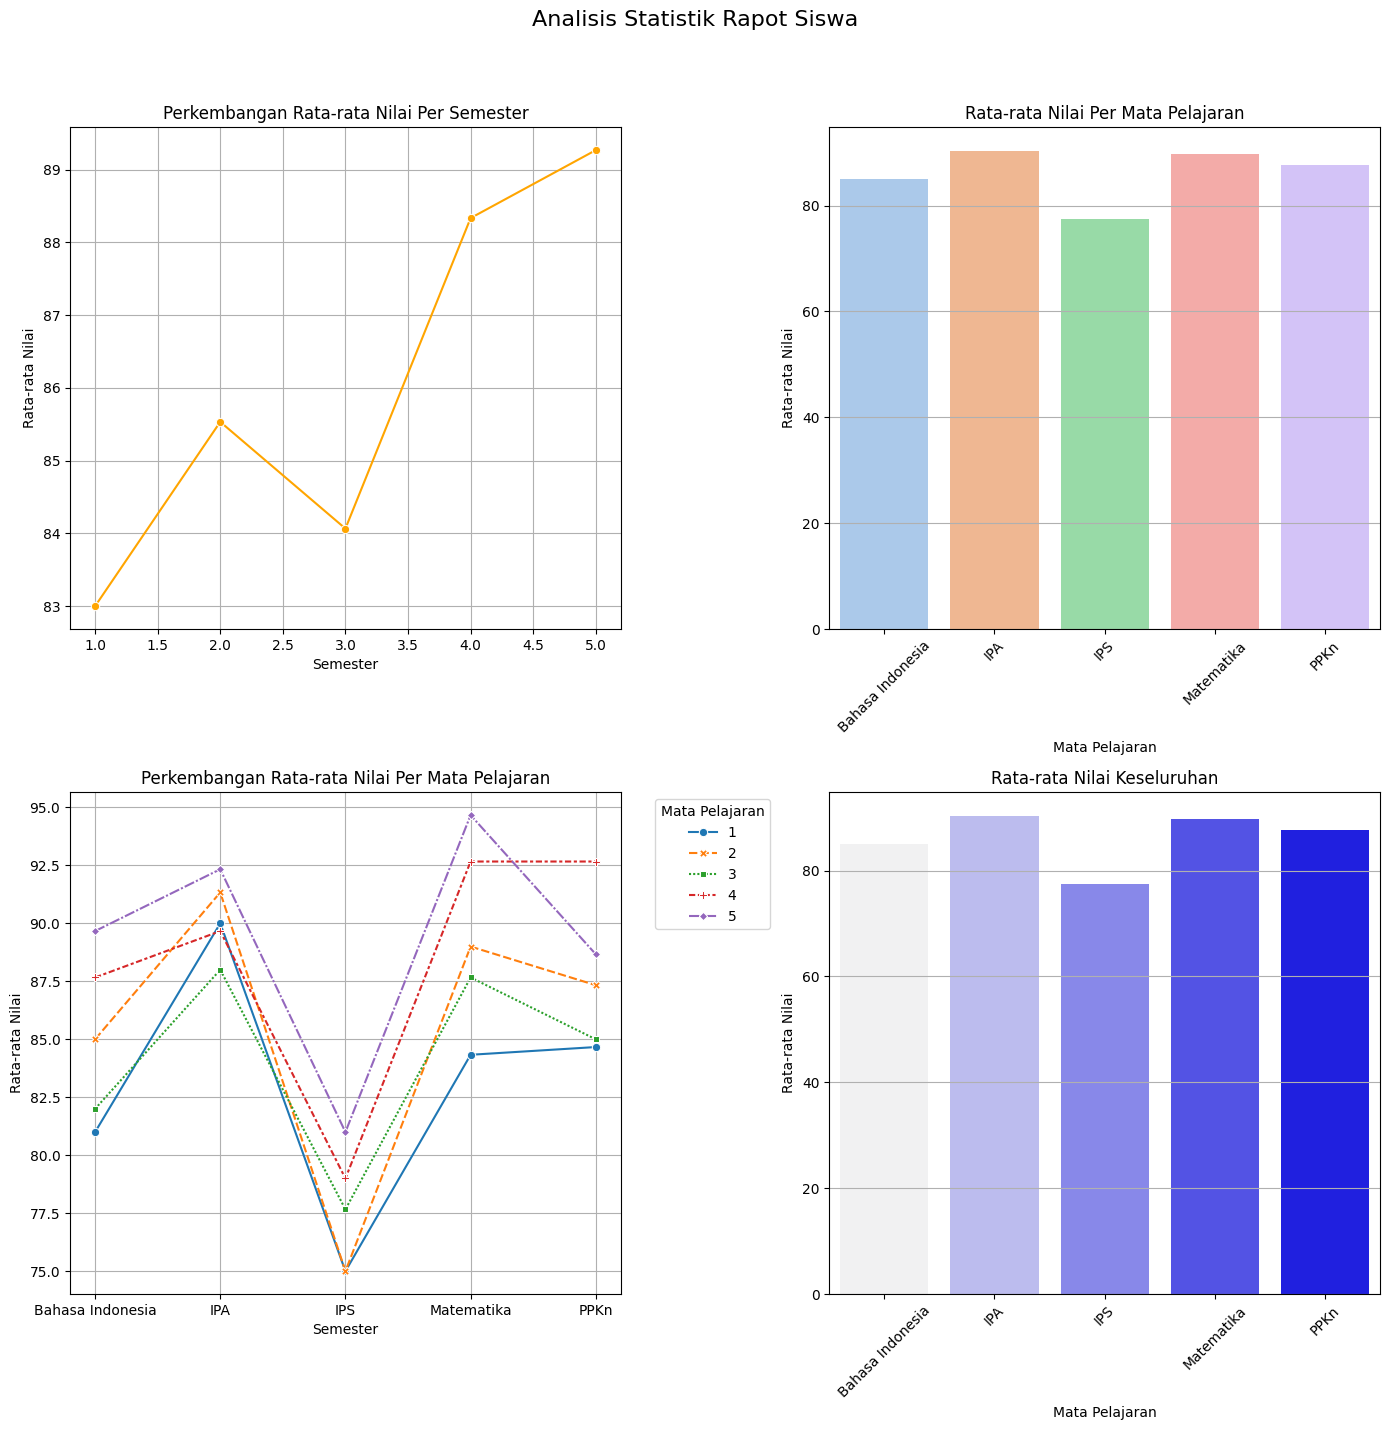

In [33]:
# Menyiapkan figure dan axes
fig, axs = plt.subplots(2, 2, figsize=(14, 15))
fig.suptitle('Analisis Statistik Rapot Siswa', fontsize=16)

# Plot 1: Rata-rata Nilai Per Semester
sns.lineplot(x=rata_rata_per_semester.index, y=rata_rata_per_semester.values, marker='o', ax=axs[0, 0], color='orange')
axs[0, 0].set_title('Perkembangan Rata-rata Nilai Per Semester')
axs[0, 0].set_xlabel('Semester')
axs[0, 0].set_ylabel('Rata-rata Nilai')
axs[0, 0].grid()

# Plot 2: Rata-rata Nilai Per Mata Pelajaran
sns.barplot(x=rata_rata_mata_pelajaran.index, y=rata_rata_mata_pelajaran.values, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Rata-rata Nilai Per Mata Pelajaran')
axs[0, 1].set_xlabel('Mata Pelajaran')
axs[0, 1].set_ylabel('Rata-rata Nilai')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y')

# Plot 3: Perkembangan Rata-rata Nilai Per Mata Pelajaran Selama Semester
nilai_per_semester = rapot_df.groupby(['Semester', 'Mata Pelajaran'])['Rata-rata'].mean().unstack()
sns.lineplot(data=nilai_per_semester.T, ax=axs[1, 0], markers=True)
axs[1, 0].set_title('Perkembangan Rata-rata Nilai Per Mata Pelajaran')
axs[1, 0].set_xlabel('Semester')
axs[1, 0].set_ylabel('Rata-rata Nilai')
axs[1, 0].grid()
axs[1, 0].legend(title='Mata Pelajaran', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Rata-rata Nilai Keseluruhan
sns.barplot(x=rata_rata_mata_pelajaran.index, y=rata_rata_mata_pelajaran.values, ax=axs[1, 1], palette='light:blue')
axs[1, 1].set_title('Rata-rata Nilai Keseluruhan')
axs[1, 1].set_xlabel('Mata Pelajaran')
axs[1, 1].set_ylabel('Rata-rata Nilai')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y')

# Menyesuaikan layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()